### Instructions

В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне.
Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе).
Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=true).
Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних.
Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).
Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?
Решение должно представлять собой IPython-ноутбук, содержащий:
- код, генерирующий выборки и графики;
- краткие описания каждого блока кода, объясняющие, что он делает;
- необходимые графики (убедитесь, что на них подписаны оси);
- выкладки с вычислениями параметров нормальных распределений, аппроксимирующих выборочные средние при различных n;
- выводы по результатам выполнения задания.

_____________

### Solution

1. Подключение необходимых библиотек

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

- cгенерируйте из выбранного распределения выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=true).

In [3]:
# (1) задание СВ t-распределением. генерация выборки объёма 1000 из t-распределения (при df=3)

df = 3    #задание параметра [df] число степеней свободы (т.е. df - shape parameter, degrees of freedom)
t_rv = sts.t(df)    #задание случайной величины с t-распределением
t_sample = t_rv.rvs(size=1000)    #генерация выборки объёма 1000 из t-распределения (т.е. сгенерируем 1000 значений)
#print t_sample

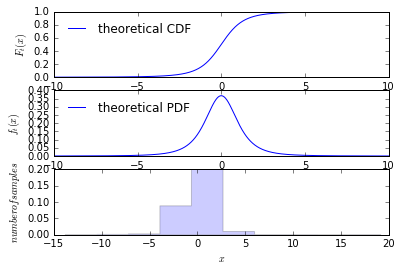

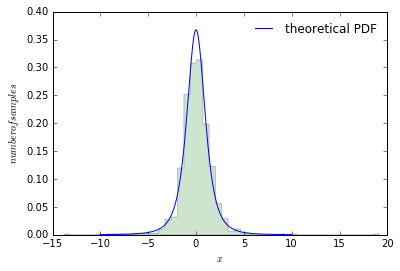

In [5]:
# (2) график функции распределения (CDF) и функции плотности вероятности распределения (PDF)

x = np.linspace(-10,10,1000) #задание значений аргумента для функции распределения
cdf = t_rv.cdf(x) #присваивание функции распределения t случайной величины в точке, соответствующей её аргументу
pdf = t_rv.pdf(x) #присваивание функции плотности вероятности t случайной величины в точке, соответствующей её аргументу

plt.subplot(3,1,1) #формирование пространсва из 2 графиков, где каждый расположен на своей строке, и обращение к 1 из них
plt.plot(x, cdf) #построение графика функции распределения t случайной величины в точке, соответствующей её аргументу
plt.ylabel('$F_t(x)$') #подпись оси ординат
plt.xlabel('$x$') #подпись оси абсцисс
plt.legend(['theoretical CDF'], loc='upper left', frameon=False) #подпись легенды графика

plt.subplot(3,1,2) #.. обращение к 2 графику на 2-ой строке
plt.plot(x, pdf) #построение графика функции плотности вероятности t случайной величины в точке, соответствующей её аргументу
plt.ylabel('$f_t(x)$') #подпись оси ординат
plt.xlabel('$x$') #подпись оси абсцисс
plt.legend(['theoretical PDF'], loc='upper left', frameon=False) #подпись легенды графика

plt.subplot(3,1,3) #.. обращение к 3 графику на 3-ей строке
plt.hist(t_sample, normed=True, histtype='stepfilled', alpha=0.2) #построение графика функции плотности вероятности t случайной величины в точке, соответствующей её аргументу
plt.ylabel('$number of samples$') #подпись оси ординат
plt.xlabel('$x$') #подпись оси абсцисс
plt.legend() #подпись легенды графика

plt.savefig('w4_ht_1.pdf') #сохранение в файл
plt.show() #вывод графика на экран

# (4) график гистограммы выборки и теоретической плотности распределения вероятности случайной величены

plt.plot(x, pdf) #построение графика функции плотности вероятности t случайной величины в точке, соответствующей её аргументу
plt.legend(['theoretical PDF'], loc='best', frameon=False) #подпись легенды графика
plt.hist(t_sample, bins=50, normed=True, histtype='stepfilled', alpha=0.2)
plt.ylabel('$number of samples$') #подпись оси ординат
plt.xlabel('$x$') #подпись оси абсцисс

plt.savefig('w4_ht_2.pdf') #сохранение в файл
plt.show() #вывод графика на экран

________

- оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних.
- используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

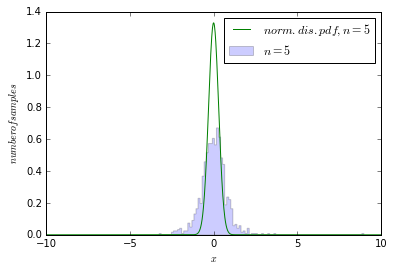

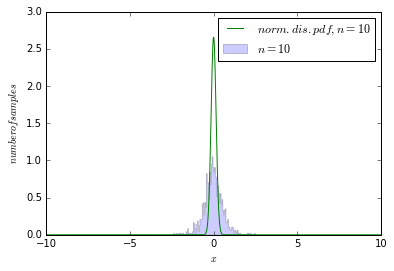

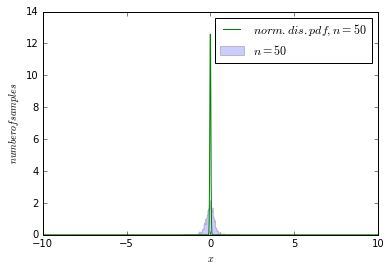

In [12]:
# (3) оценка распределение выборочного среднего, и аппроксимация нормальным распределением

Mt = 0 #математическое ожидание случайной величены, имеющей t-распределение (в силу симметрии ее кривой распределения равно 0) )
Dt = float(df/(df-2)) #дисперсия случайной величены, имеющей t-распределение [D(t)=df/(df-2)]
x_axis = np.linspace(-10,10,1000)
df = 3    #задание параметра [df] число степеней свободы (т.е. df - shape parameter, degrees of freedom)
n1 = 5
n2 = 10
n3 = 50
sample_size = 1000
Xmean_n1 = []
Xmean_n2 = []
Xmean_n3 = []
#Xmean_sum1 = []
#Xmean_sum2 = []
#Xmean_sum3 = []
c1=0
c2=0
c3=0
X = sts.t(df)

while c1 != sample_size:
    Xn1 = X.rvs(size=n1)
    Xmean1 = Xn1.mean()
    Xmean_n1.append(Xmean1)
    #print "Counter", c1, '\n', "Xn1", Xn1, '\n', "Xmean1", Xmean1,'\n', "Xmean_n1", Xmean_n1, '\n'*2
    c1 += 1

plt.hist(Xmean_n1, normed=True, bins=100, histtype='stepfilled', alpha=0.2, label="$n=%s$" % n1)

mu1 = Mt #параметр случайной величены с нормальным распределением (мю)
sigma1 = (Dt**1/2)/n1 #параметр случайной величены с нормальным распределением (сигма)
norm_rv1 = sts.norm(loc=mu1, scale=sigma1) #задание нормально распределенной случайной величины
Npdf1 = norm_rv1.pdf(x_axis)
plt.plot(x_axis, Npdf1, label="$norm.dis. pdf, n=%s$" % n1)

plt.ylabel('$number of samples$') #подпись оси ординат
plt.xlabel('$x$') #подпись оси абсцисс
plt.legend()
plt.show()

while c2 != sample_size:
    Xn2 = X.rvs(size=n2)
    Xmean2 = Xn2.mean()
    Xmean_n2.append(Xmean2)
    #print "Counter", c2, '\n', "Xn2", Xn2, '\n', "Xmean2", Xmean2,'\n', "Xmean_n2", Xmean_n2, '\n'*2
    c2 += 1
plt.hist(Xmean_n2, normed=True, bins=100, histtype='stepfilled', alpha=0.2, label="$n=%s$" % n2)

mu2 = Mt #параметр случайной величены с нормальным распределением (мю)
sigma2 = (Dt**1/2)/n2 #параметр случайной величены с нормальным распределением (сигма)
norm_rv2 = sts.norm(loc=mu2, scale=sigma2) #задание нормально распределенной случайной величины
Npdf2 = norm_rv2.pdf(x_axis)
plt.plot(x_axis, Npdf2, label="$norm.dis. pdf, n=%s$" % n2)

plt.ylabel('$number of samples$') #подпись оси ординат
plt.xlabel('$x$') #подпись оси абсцисс
plt.legend()
plt.show()

while c3 != sample_size:
    Xn3 = X.rvs(size=n3)
    Xmean3 = Xn3.mean()
    Xmean_n3.append(Xmean3)
    #print "Counter", c3, '\n', "Xn3", Xn3, '\n', "Xmean3", Xmean3,'\n', "Xmean_n3", Xmean_n3, '\n'*2
    c3 += 1
plt.hist(Xmean_n3, normed=True, bins=100, histtype='stepfilled', alpha=0.2, label="$n=%s$" % n3)

mu3 = Mt #параметр случайной величены с нормальным распределением (мю)
sigma3 = (Dt**1/2)/n3 #параметр случайной величены с нормальным распределением (сигма)
norm_rv3 = sts.norm(loc=mu3, scale=sigma3) #задание нормально распределенной случайной величины
Npdf3 = norm_rv3.pdf(x_axis)
plt.plot(x_axis, Npdf3, label="$norm.dis. pdf, n=%s$" % n3)

plt.ylabel('$number of samples$') #подпись оси ординат
plt.xlabel('$x$') #подпись оси абсцисс
plt.legend()
plt.show()

- опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n

### Results

- Распределение выборочных средних хорошо поддается описанию нормальным распределением (о чем и утверждает ЦПТ);
- Дальнейшее увеличение выборки (n) не влияет на форму гистограммы, она становится только боле узкой, сконцентрированной вокруг среднего значения (Mt=0);
- С ростом объема выборки (n) СВ из t-распределения, также возрастает и точность аппроксимации нормальным распределением, т.е. тем лучше распределение описывается нормальным.